<a href="https://colab.research.google.com/github/derrickt0101/Data-Science/blob/main/Derrickcopy_of_Hahn_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [2]:
##variables

In [3]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
##be able to get the files

In [5]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [6]:
url = "https://docs.google.com/presentation/d/1T74VMrj6YKkDO604xKWylyRbR9Ycg6396K6E0ciIUMg/edit#slide=id.g19b8867b70f_0_176"

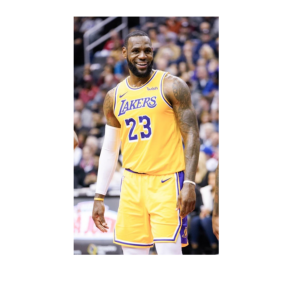

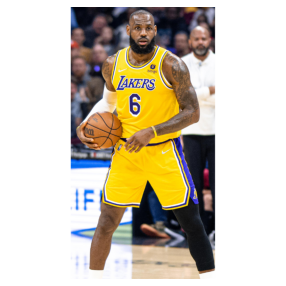

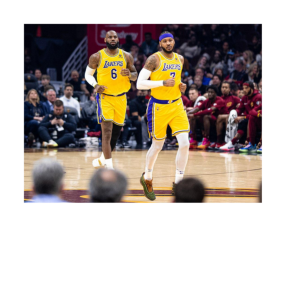

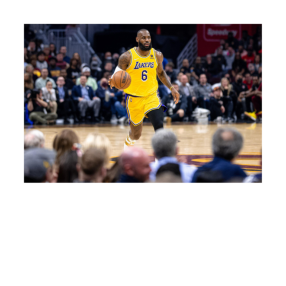

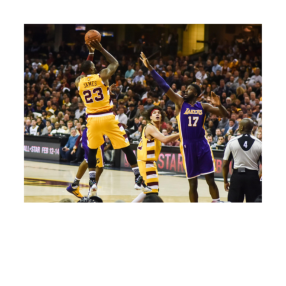

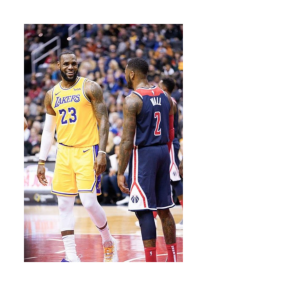

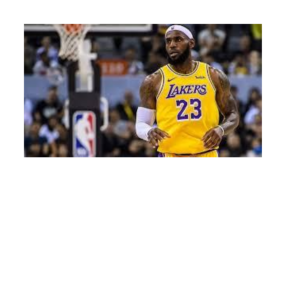

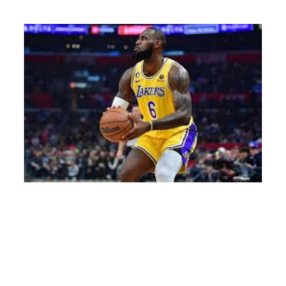

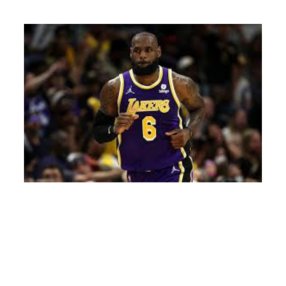

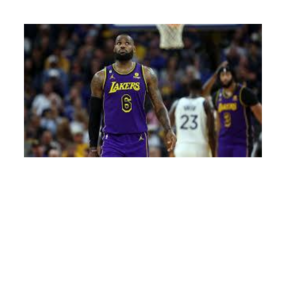

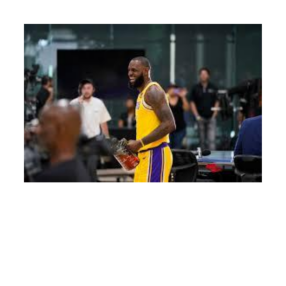

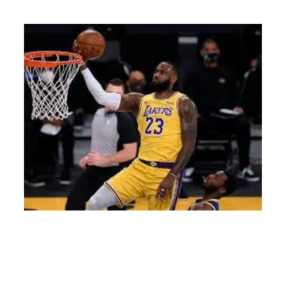

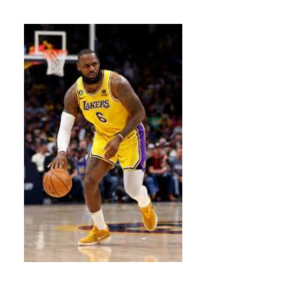

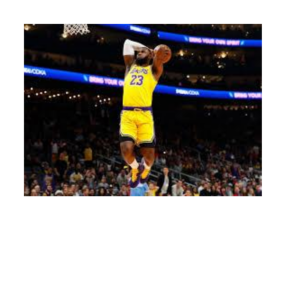

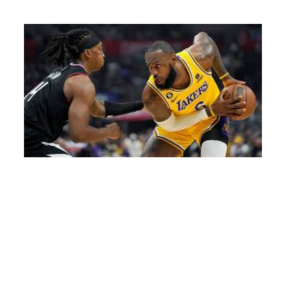

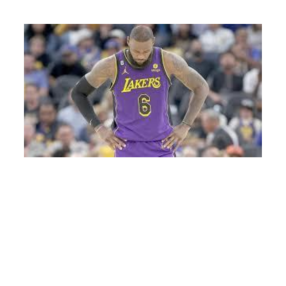

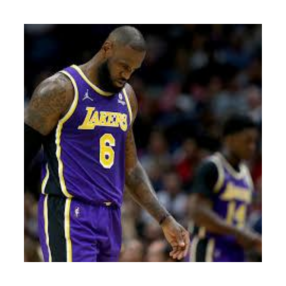

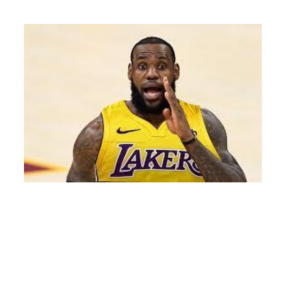

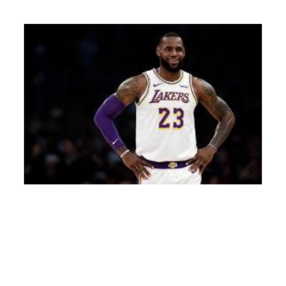

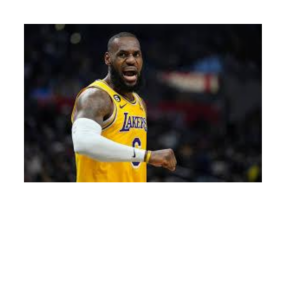

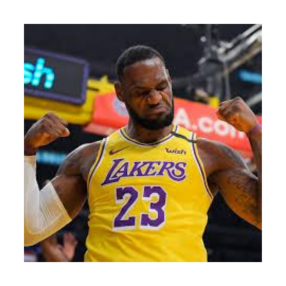

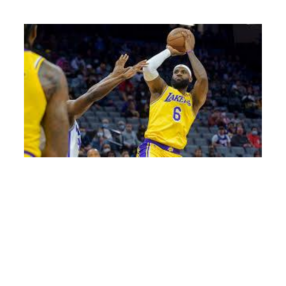

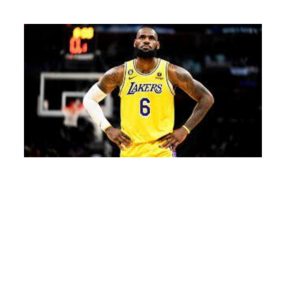

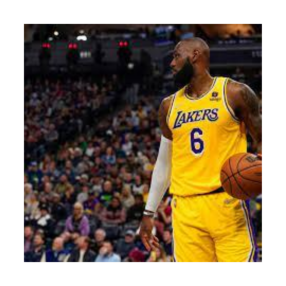

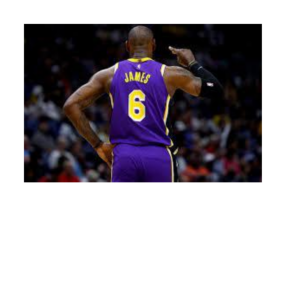

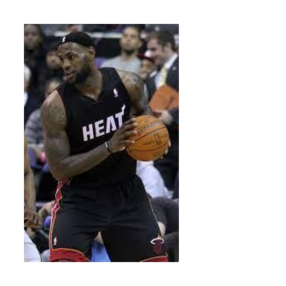

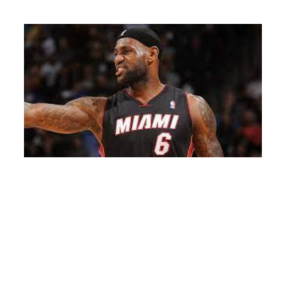

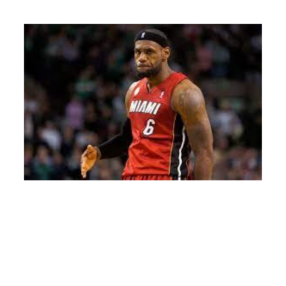

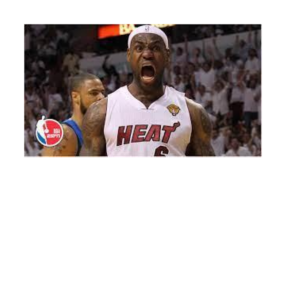

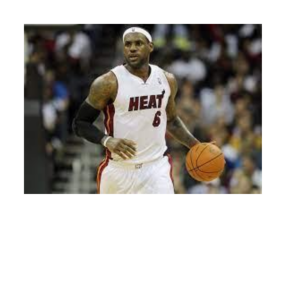

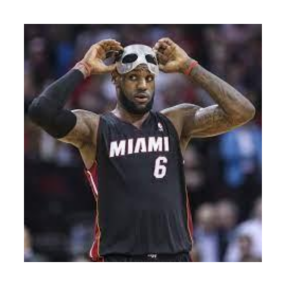

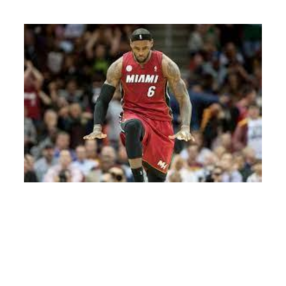

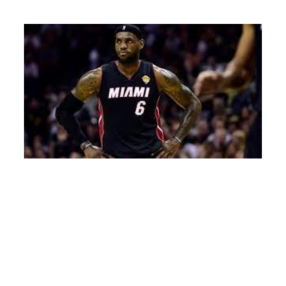

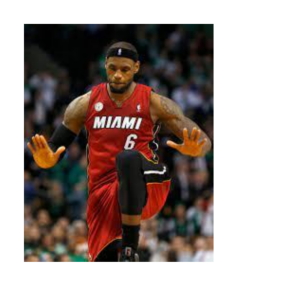

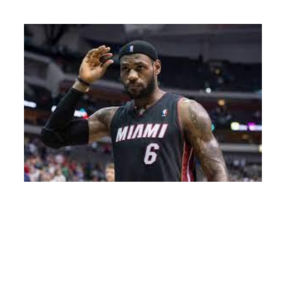

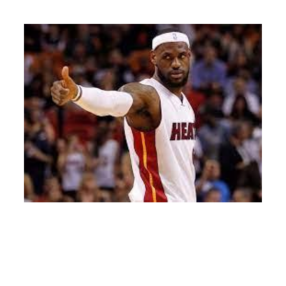

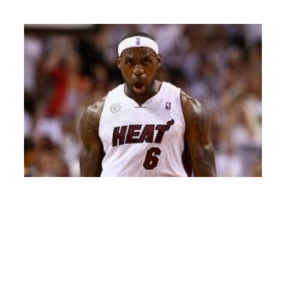

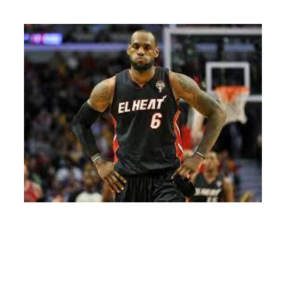

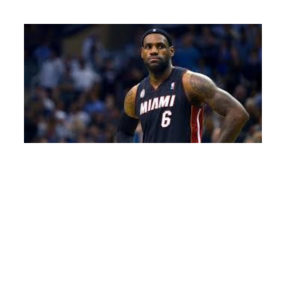

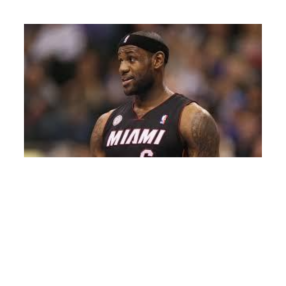

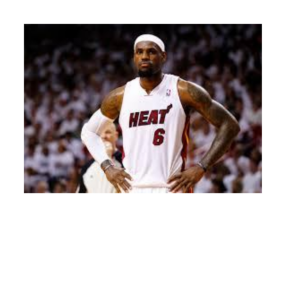

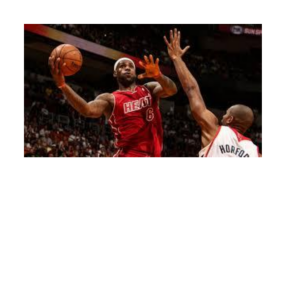

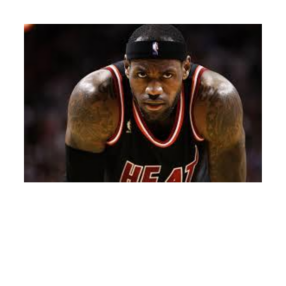

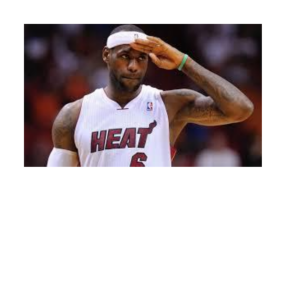

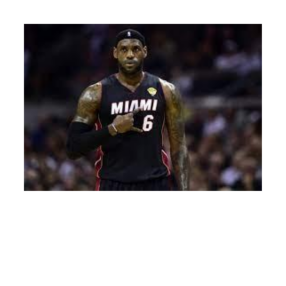

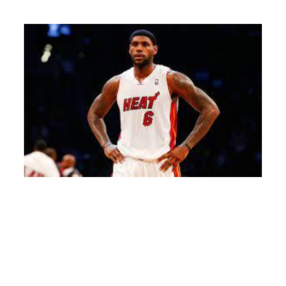

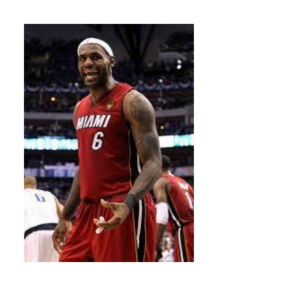

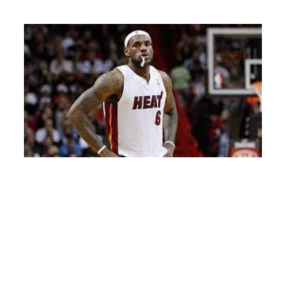

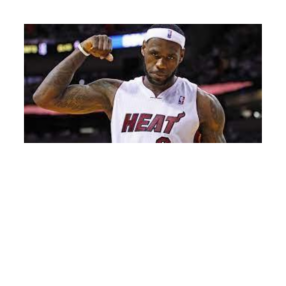

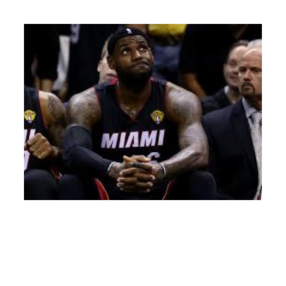

In [7]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
##images

In [8]:
images.shape

torch.Size([50, 3, 224, 224])

In [ ]:
##size

In [9]:
model(images)

tensor([[-3.4365, -6.0431, -1.8992,  ..., -6.4321,  2.9867,  2.1342],
        [-3.6194, -6.0882, -0.2137,  ..., -8.2760,  3.1911,  2.5351],
        [-4.2770, -2.7451, -3.2346,  ..., -4.3703,  2.8510,  0.1402],
        ...,
        [-4.7022, -4.7058, -1.4072,  ..., -4.7389, -1.8567,  2.7799],
        [-2.6786, -4.1063, -2.5804,  ..., -3.8298, -1.5881,  2.9730],
        [-0.9819, -4.2201, -2.6919,  ..., -2.6483,  0.0525, -0.2154]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [10]:
y = model(images)

In [11]:
y.shape

torch.Size([50, 1000])

In [12]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [13]:
for i in list(guesses):
    print(labels[i])

tennis ball
soccer ball
television, television system
television, television system
puck, hockey puck
binder, ring-binder
web site, website, internet site, site
web site, website, internet site, site
academic gown, academic robe, judge's robe
web site, website, internet site, site
web site, website, internet site, site
ski
screen, CRT screen
web site, website, internet site, site
web site, website, internet site, site
Doberman, Doberman pinscher
horizontal bar, high bar
web site, website, internet site, site
web site, website, internet site, site
parallel bars, bars
ping-pong ball
web site, website, internet site, site
jersey, T-shirt, tee shirt
ping-pong ball
horizontal bar, high bar
bulletproof vest
web site, website, internet site, site
parallel bars, bars
web site, website, internet site, site
notebook, notebook computer
horizontal bar, high bar
web site, website, internet site, site
web site, website, internet site, site
football helmet
web site, website, internet site, site
horiz

In [14]:
Y = np.zeros(50,)
Y[25:] = 1

In [15]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
X = y.detach().cpu().numpy() 

In [17]:
X.shape

(50, 1000)

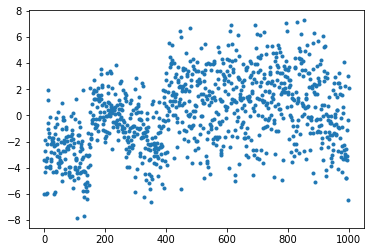

In [18]:
plt.plot(X[0],'.')

In [ ]:
##plottt

In [19]:
X[0]

array([-3.43650627e+00, -6.04314947e+00, -1.89917850e+00, -4.31543779e+00,
       -2.69770861e+00, -3.92296481e+00, -6.00365353e+00, -3.50687099e+00,
       -3.28915882e+00, -5.94241476e+00, -2.14750504e+00,  1.21354771e+00,
        1.94966125e+00, -1.06726289e+00, -5.47459066e-01, -3.91583204e+00,
       -1.36964715e+00, -1.61058855e+00, -3.99186492e+00, -9.73068029e-02,
       -3.86202693e+00, -2.78510571e+00, -3.35672331e+00, -3.46876097e+00,
       -2.16272545e+00, -1.69906354e+00, -1.84234464e+00, -2.13946319e+00,
       -1.69879246e+00, -4.34731960e+00, -2.04530573e+00, -2.30362773e+00,
       -2.89848661e+00, -5.97930145e+00, -5.88956738e+00, -1.39552498e+00,
       -8.90770376e-01, -2.24529839e+00, -2.20206469e-01, -4.30629206e+00,
       -4.23117256e+00, -3.12289762e+00, -2.21486521e+00, -6.37405515e-01,
       -1.81340301e+00,  2.68212855e-01, -2.62923670e+00, -3.65927601e+00,
       -3.97158933e+00, -3.68805742e+00, -3.17692900e+00, -3.58452654e+00,
       -3.36993194e+00, -

In [20]:
np.argmax(X[0])

852

In [21]:
labels[948]

'Granny Smith'

In [22]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [23]:
for i in top_ten:
    print(labels[i])

tennis ball
stretcher
ski
packet
kimono
carton
jersey, T-shirt, tee shirt
binder, ring-binder
sleeping bag
ping-pong ball


In [ ]:
#pulling up variable info

In [24]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [ ]:
#histogram

(array([  5.,  29.,  93., 147., 193., 192., 166., 115.,  43.,  17.]),
 array([-7.8389635 , -6.326419  , -4.813874  , -3.3013291 , -1.7887844 ,
        -0.27623963,  1.2363051 ,  2.7488499 ,  4.2613945 ,  5.7739396 ,
         7.2864842 ], dtype=float32),
 <a list of 10 Patch objects>)

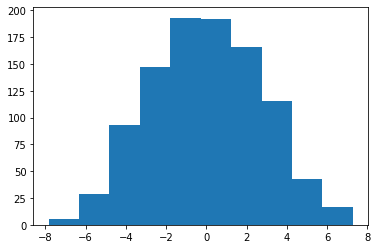

In [25]:
plt.hist(X[0])

In [26]:
X = GPU_data(X)
Y = GPU_data(Y)

In [27]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [28]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [29]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [30]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [31]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [32]:
X.shape

torch.Size([50, 1000])

In [33]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [34]:
def model(x,w):

    return x@w[0]

In [35]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

https://tensorspace.org/